# **1. Configuración del Ambiente**


---

In [41]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
global df_banco, resultados

# **2. Análisis Exploratorio de Datos (EDA)**


---


In [42]:
# Leer el archivo CSV comprimido
df_banco = pd.read_csv('Data/df_banco_final.csv.gz', compression='gzip', sep=';')

In [43]:
df_banco

,step,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CC,type2_CM
0,1,9839.64,0,0,0,0,1,0,0,1
1,1,1864.28,0,0,0,0,1,0,0,1
2,1,181.00,1,0,0,0,0,1,1,0
3,1,181.00,1,0,1,0,0,0,1,0
4,1,11668.14,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6355046,743,339682.13,1,0,1,0,0,0,1,0
6355047,743,6311409.28,1,0,0,0,0,1,1,0
6355048,743,6311409.28,1,0,1,0,0,0,1,0
6355049,743,850002.52,1,0,0,0,0,1,1,0


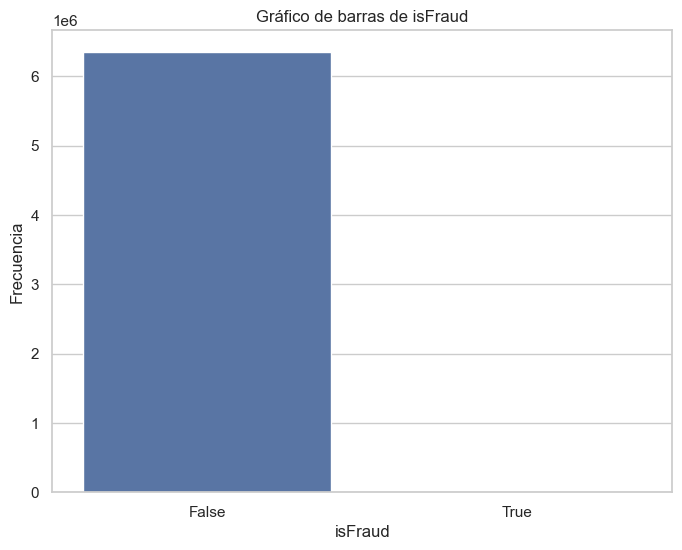

In [44]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Contar la frecuencia de cada valor de 'isFraud'
conteo_isFraud = df_banco['isFraud'].value_counts()

# Generar un gráfico de barras para 'isFraud'
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_isFraud.index, y=conteo_isFraud.values)
plt.title('Gráfico de barras de isFraud')
plt.xlabel('isFraud')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

In [45]:
# Contar la cantidad de datos para cada valor de 'isFraud'
cantidad_isFraud_1 = (df_banco['isFraud'] == 1).sum()  # Cantidad de datos con valor 1 (True)
cantidad_isFraud_0 = (df_banco['isFraud'] == 0).sum()  # Cantidad de datos con valor 0 (False)

# Mostrar la cantidad de datos para cada valor de 'isFraud'
print("Cantidad de datos para 'isFraud' con valor 1 (True):", cantidad_isFraud_1)
print("Cantidad de datos para 'isFraud' con valor 0 (False):", cantidad_isFraud_0)

Cantidad de datos para 'isFraud' con valor 1 (True): 8103
Cantidad de datos para 'isFraud' con valor 0 (False): 6346948


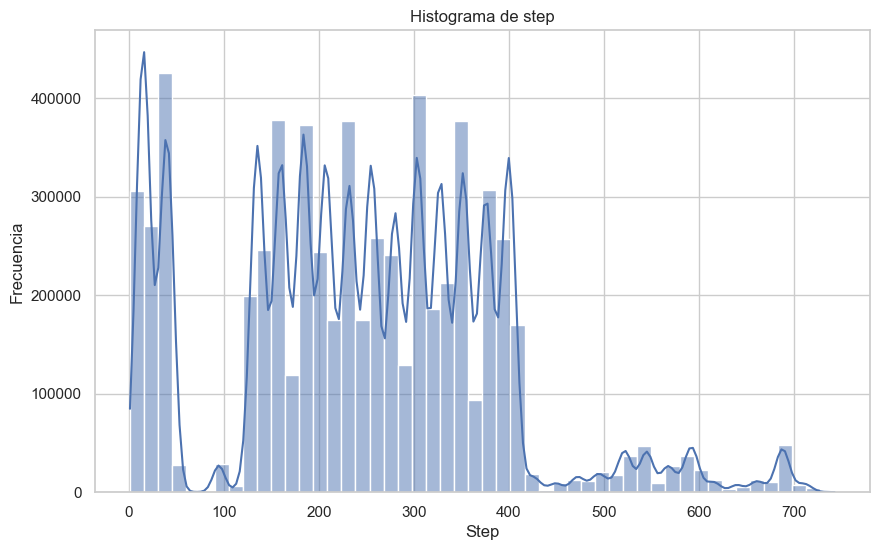

In [46]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Generar un histograma para 'step'
plt.figure(figsize=(10, 6))
sns.histplot(df_banco['step'], bins=50, kde=True)
plt.title('Histograma de step')
plt.xlabel('Step')
plt.ylabel('Frecuencia')
plt.show()


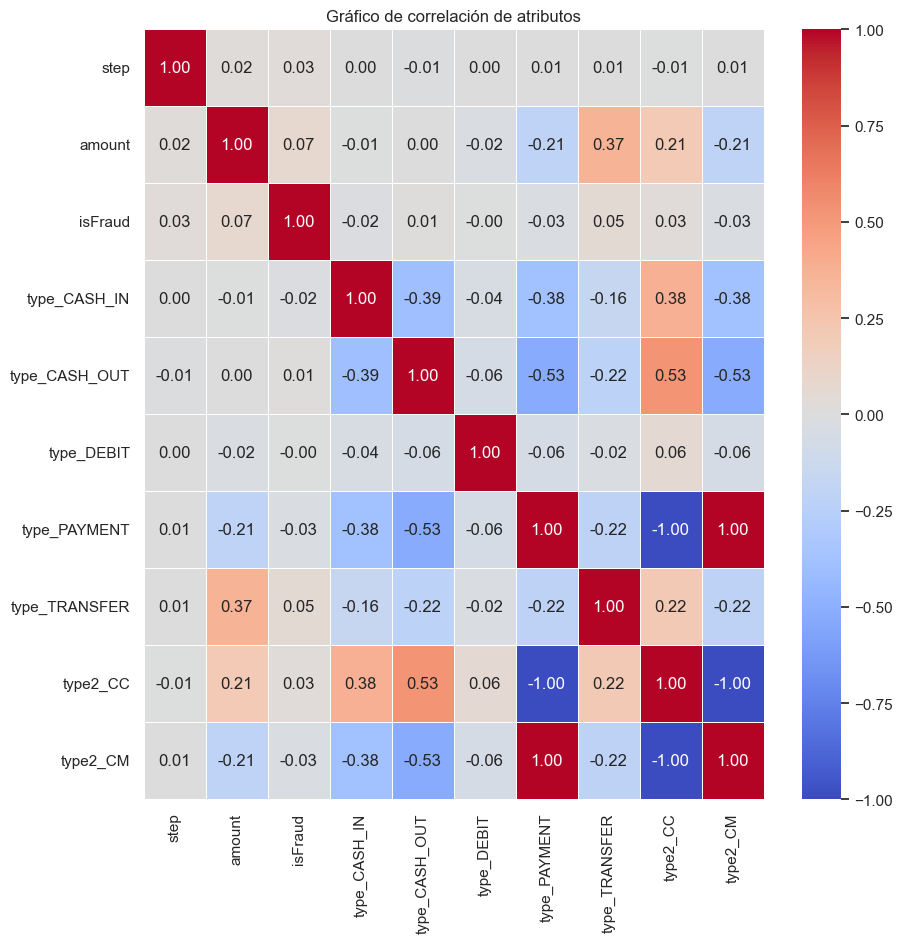

In [47]:
# Calcular la matriz de correlación
correlation_matrix = df_banco.corr()

# Generar el gráfico de correlación
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linecolor='white', linewidths=0.5)
plt.title('Gráfico de correlación de atributos')
plt.show()


In [48]:
# Imprimir las correlaciones
print("Correlaciones:")
print(correlation_matrix)

Correlaciones:
                   step    amount   isFraud  type_CASH_IN  type_CASH_OUT  \
step           1.000000  0.019452  0.030934      0.004109      -0.012835   
amount         0.019452  1.000000  0.074655     -0.005984       0.000968   
isFraud        0.030934  0.074655  1.000000     -0.018983       0.011159   
type_CASH_IN   0.004109 -0.005984 -0.018983      1.000000      -0.391587   
type_CASH_OUT -0.012835  0.000968  0.011159     -0.391587       1.000000   
type_DEBIT     0.002877 -0.024348 -0.002894     -0.043036      -0.059705   
type_PAYMENT   0.005300 -0.205158 -0.025528     -0.379581      -0.526597   
type_TRANSFER  0.006109  0.365387  0.053691     -0.160246      -0.222311   
type2_CC      -0.005300  0.205158  0.025528      0.379581       0.526597   
type2_CM       0.005300 -0.205158 -0.025528     -0.379581      -0.526597   

               type_DEBIT  type_PAYMENT  type_TRANSFER  type2_CC  type2_CM  
step             0.002877      0.005300       0.006109 -0.005300  0.005

In [49]:
# Eliminar la variable type2_CC del DataFrame
df_banco.drop(columns=['type2_CC', 'type2_CM'], inplace=True)


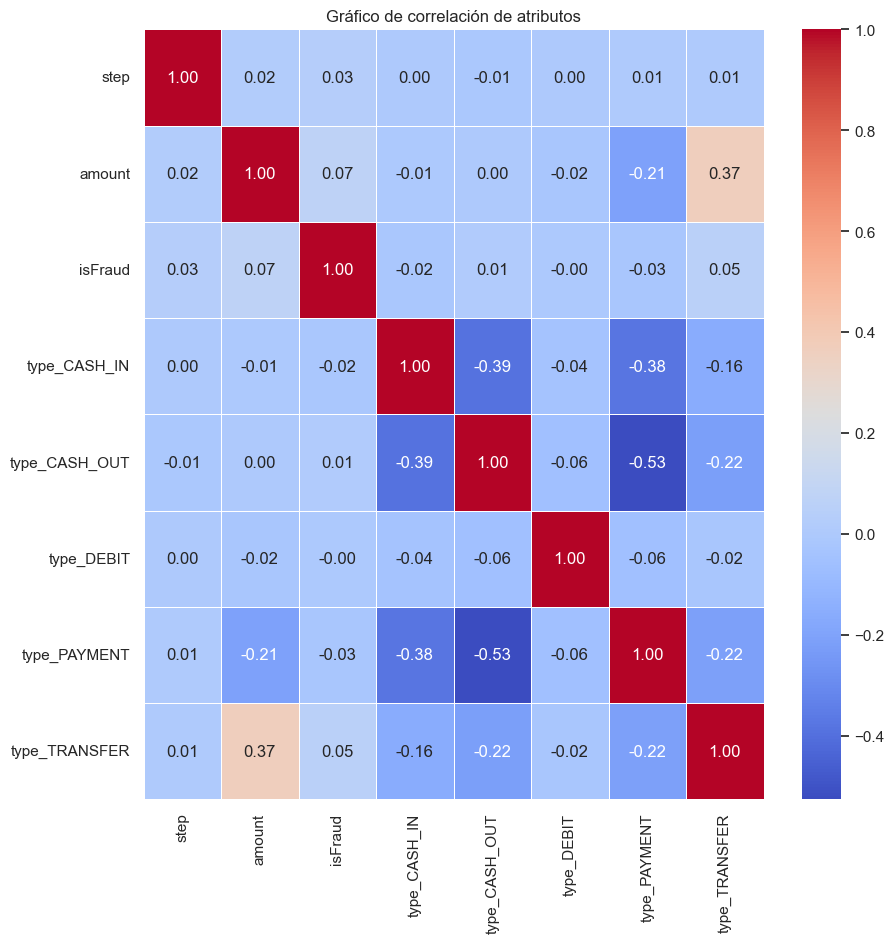

In [50]:
# Calcular la matriz de correlación
correlation_matrix = df_banco.corr()

# Generar el gráfico de correlación
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linecolor='white', linewidths=0.5)
plt.title('Gráfico de correlación de atributos')
plt.show()

In [51]:
# Imprimir las correlaciones
print("Correlaciones:")
print(correlation_matrix)

Correlaciones:
                   step    amount   isFraud  type_CASH_IN  type_CASH_OUT  \
step           1.000000  0.019452  0.030934      0.004109      -0.012835   
amount         0.019452  1.000000  0.074655     -0.005984       0.000968   
isFraud        0.030934  0.074655  1.000000     -0.018983       0.011159   
type_CASH_IN   0.004109 -0.005984 -0.018983      1.000000      -0.391587   
type_CASH_OUT -0.012835  0.000968  0.011159     -0.391587       1.000000   
type_DEBIT     0.002877 -0.024348 -0.002894     -0.043036      -0.059705   
type_PAYMENT   0.005300 -0.205158 -0.025528     -0.379581      -0.526597   
type_TRANSFER  0.006109  0.365387  0.053691     -0.160246      -0.222311   

               type_DEBIT  type_PAYMENT  type_TRANSFER  
step             0.002877      0.005300       0.006109  
amount          -0.024348     -0.205158       0.365387  
isFraud         -0.002894     -0.025528       0.053691  
type_CASH_IN    -0.043036     -0.379581      -0.160246  
type_CASH_OUT  

In [52]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355051 entries, 0 to 6355050
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   step           int64  
 1   amount         float64
 2   isFraud        int64  
 3   type_CASH_IN   int64  
 4   type_CASH_OUT  int64  
 5   type_DEBIT     int64  
 6   type_PAYMENT   int64  
 7   type_TRANSFER  int64  
dtypes: float64(1), int64(7)
memory usage: 387.9 MB


## **2.1. Análisis de Boxplot**

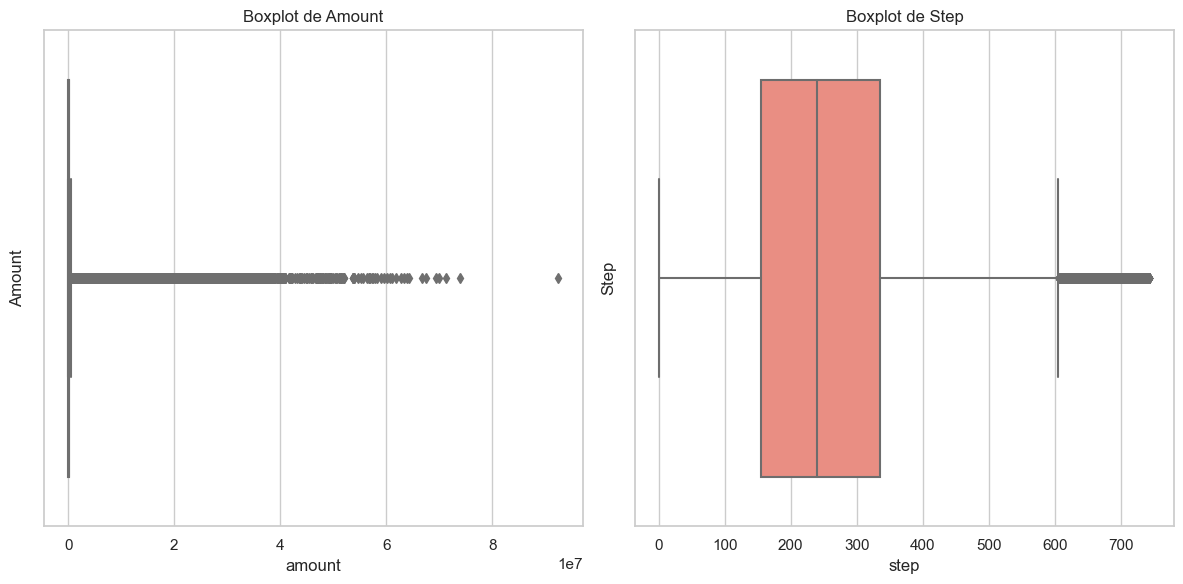

In [53]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Boxplot para la variable 'amount'
plt.subplot(1, 2, 1)
sns.boxplot(x=df_banco['amount'], orient='vertical', color='skyblue')
plt.title('Boxplot de Amount')
plt.ylabel('Amount')

# Boxplot para la variable 'step'
plt.subplot(1, 2, 2)
sns.boxplot(x=df_banco['step'], orient='vertical', color='salmon')
plt.title('Boxplot de Step')
plt.ylabel('Step')

# Mostrar los boxplots
plt.tight_layout()
plt.show()

##### **No se eliminaran outliers de Step pues esta variable representa las horas del mes ni tampoco Amount pues son montos de dinero que se reflejaron en las transacciones**

## **2.2. Histogramas y Gráficos de Densidad**